# Data Analysis

In [7]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from datetime import date


# Primeras aproximaciones de análisis

data_ana = pd.read_csv("data_global.csv", sep = ',')
del(data_ana['Unnamed: 0'])
data_ana.shape

(8988, 34)

In [8]:
# Lo primero es quitar duplicados, no nos sirven ya de nada y de momento no vamos a analizar rankings
data_ana = data_ana.drop_duplicates(subset='spotify_id')
data_ana.shape

(295, 34)

In [9]:
print(data_ana.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 295 entries, 0 to 8987
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Position           295 non-null    int64  
 1   Track Name         295 non-null    object 
 2   Artist             295 non-null    object 
 3   Streams            295 non-null    int64  
 4   date               295 non-null    object 
 5   spotify_id         295 non-null    object 
 6   year               295 non-null    int64  
 7   Streamstotal       295 non-null    int64  
 8   album              295 non-null    object 
 9   release_date       295 non-null    object 
 10  length             295 non-null    float64
 11  popularity         295 non-null    float64
 12  acousticness       295 non-null    float64
 13  danceability       295 non-null    float64
 14  energy             295 non-null    float64
 15  instrumentalness   295 non-null    float64
 16  liveness           295 no

## Para poder hacer ponderación para medias por streams totales

In [85]:
data_ana.head(2)

,Position,Track Name,Artist,Streams,date,spotify_id,year,Streamstotal,album,release_date,...,genre4,genre5,genre6,genre7,genre8,genre9,artist_id,artist_followers,artist_popularity,streamstotal_weights
0,2,La Difícil,Bad Bunny,399788,2020-03-14,6NfrH0ANGmgBXyxgV2PeXt,2020,14996733,YHLQMDLG,2020-02-28,...,NaN,NaN,NaN,NaN,NaN,NaN,4q3ewBCX7sLwd24euuV69X,23787073,97,434626516
61,6,Ignorantes,Bad Bunny,295813,2020-03-14,38RIEav39FGi86jppxO0du,2020,10423435,YHLQMDLG,2020-02-28,...,NaN,NaN,NaN,NaN,NaN,NaN,4q3ewBCX7sLwd24euuV69X,23787073,97,434626516


In [92]:
data_ana_2020 = data_ana[data_ana['year'] == 2020]
data_ana_2019 = data_ana[data_ana['year'] == 2019]

total_streams_2020 = data_ana_2020['Streamstotal'].sum()
total_streams_2019 = data_ana_2019['Streamstotal'].sum()

if data_ana[data_ana['year'] == 2020]:
    data_ana['streamstotal_weights'] = data_ana_2020['Streamstotal'].sum()
elif data_ana[data_ana['year'] == 2019]:
    data_ana['streamstotal_weights'] = data_ana_2019['Streamstotal'].sum()


ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [79]:
# Sacar los weights de cada canción respecto a sus Streams totales


'''if data_ana[data_ana['year'] == 2020]:
    data_ana['streamstotal_weights'] = data_ana_2020['Streamstotal'].sum()
elif data_ana[data_ana['year'] == 2019]
    data_ana['streamstotal_weights'] = data_ana_2019['Streamstotal'].sum()'''


'''total_streams_2020 = lambda x: data_ana['Streamstotal'].sum() if data_ana[data_ana['year'] == 2020] else None'''

print(total_streams_2020)
print(total_streams_2019)

# data_ana['streamstotal_weights'] = data_ana['Streamstotal']/ total_streams_2020

434626516
263112191


# Análisis

In [93]:
data_ana.groupby(['year']).count()

,Position,Track Name,Artist,Streams,date,spotify_id,Streamstotal,album,release_date,length,...,genre4,genre5,genre6,genre7,genre8,genre9,artist_id,artist_followers,artist_popularity,streamstotal_weights
year,,,,,,,,,,,,,,,,,,,,,
2019,133,133,133,133,133,133,133,133,133,133,...,60,36,16,7,1,1,133,133,133,133
2020,162,162,162,162,162,162,162,162,162,162,...,38,19,6,3,0,0,162,162,162,162


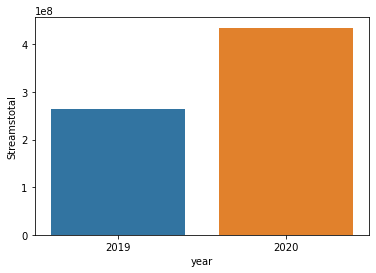

In [96]:
#Es evidente la diferencia porque hay más canciones de 2020
data_ana_onlycol_streams = data_ana.loc[:, ['year', 'Streamstotal']]
data_year_streams = data_ana_onlycol_streams.groupby(['year']).sum()
data_year_streams.reset_index(inplace=True)
data_year_streams

sns.barplot(x="year", y="Streamstotal", data=data_year_streams)

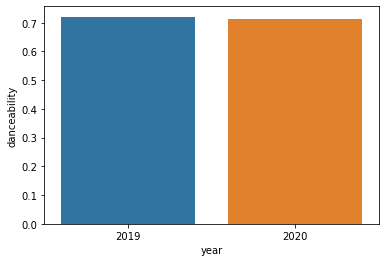

In [97]:
#Compración de danceability entre años
data_ana_onlycol_dance = data_ana.loc[:, ['year', 'danceability']]
data_year_dance = data_ana_onlycol_dance.groupby(['year']).mean()
data_year_dance.reset_index(inplace=True)
data_year_dance

sns.barplot(x="year", y="danceability", data=data_year_dance)

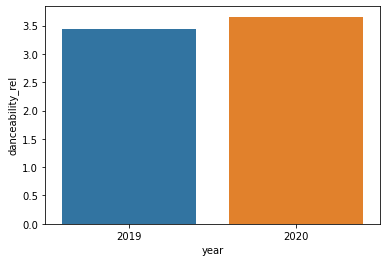

In [98]:
#Pero y si hacemos el cálculo teniendo en cuenta los Streams

data_ana['danceability_rel'] = data_ana['danceability'] / data_nodup['Streamstotal']*1000000

data_ana_onlycol_dance2 = data_ana.loc[:, ['year', 'danceability_rel']]

data_year_dance2 = data_ana_onlycol_dance2.groupby(['year']).mean()
data_year_dance2.reset_index(inplace=True)

sns.barplot(x="year", y="danceability_rel", data=data_year_dance2)

#Atención!! Ocurre lo contrario. Pero ojo, hay más canciones del año 2020 que del 2019

In [99]:
data_ana.head(2)

,Position,Track Name,Artist,Streams,date,spotify_id,year,Streamstotal,album,release_date,...,genre5,genre6,genre7,genre8,genre9,artist_id,artist_followers,artist_popularity,streamstotal_weights,danceability_rel
0,2,La Difícil,Bad Bunny,399788,2020-03-14,6NfrH0ANGmgBXyxgV2PeXt,2020,14996733,YHLQMDLG,2020-02-28,...,NaN,NaN,NaN,NaN,NaN,4q3ewBCX7sLwd24euuV69X,23787073,97,434626516,0.045677
61,6,Ignorantes,Bad Bunny,295813,2020-03-14,38RIEav39FGi86jppxO0du,2020,10423435,YHLQMDLG,2020-02-28,...,NaN,NaN,NaN,NaN,NaN,4q3ewBCX7sLwd24euuV69X,23787073,97,434626516,0.081547


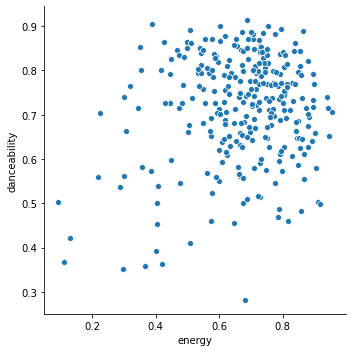

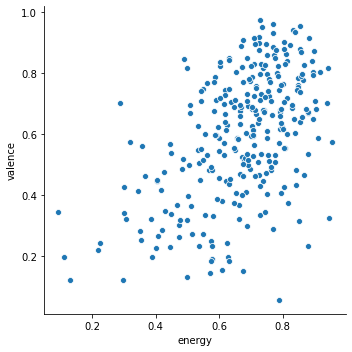

In [100]:
sns.relplot(x="energy", y="danceability", data=data_ana)
sns.relplot(x="energy", y="valence", data=data_ana)